<a href="https://colab.research.google.com/github/svarunkishore/Adaptive_Cyber_Defence_System/blob/main/PCA_Reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.3 MB/s eta 0:00:00


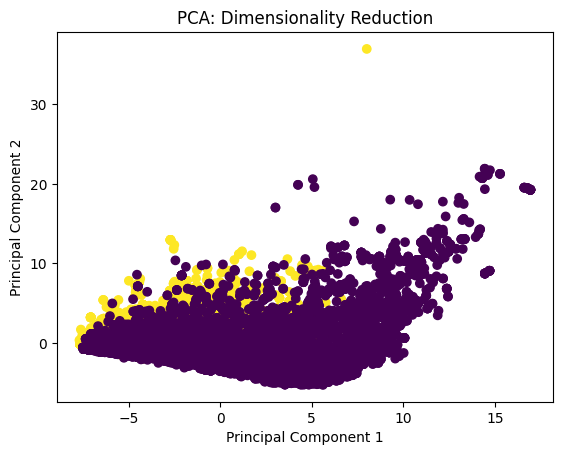

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

file_path = '/content/imputed_dataset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y), if applicable
X = df.drop('class', axis=1)  # Adjust 'target_variable' to the name of your target column
y = df['class']

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 150
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Convert class labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Concatenate the reduced features with the encoded target variable
df_final = pd.concat([df_pca, pd.Series(y_encoded, name='Encoded_Target')], axis=1)

# Visualize the reduced data
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y_encoded, cmap='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Assuming df_final is the DataFrame with the reduced features and encoded target variable
df_final.to_csv('new_dataset150.csv', index=False)






**EXTRACTING THE FEATURES OF THE PCA**

In [ ]:
# Convert DataFrame columns to a numpy array before indexing
selected_features = X.columns.to_numpy()[pca.components_[:n_components].argsort(axis=1)[:, ::-1][:, :1]]

# Create a text file and write selected features
with open('selected_features 150.txt', 'w') as file:
    for i, feature_set in enumerate(selected_features, start=1):
        file.write(', '.join(feature_set) + '\n\n')


In [ ]:
# Read and display the content of the text file
with open('selected_features 125.txt', 'r') as file:
    file_contents = file.read()
    print(file_contents)


bindService

READ_SMS

SUBSCRIBED_FEEDS_WRITE

android.os.Binder

DUMP

EXPAND_STATUS_BAR

WRITE_HISTORY_BOOKMARKS

SET_TIME

android.intent.action.CALL

android.intent.action.SENDTO

android.intent.action.SET_WALLPAPER

android.intent.action.CALL

CLEAR_APP_CACHE

WRITE_GSERVICES

READ_USER_DICTIONARY

READ_USER_DICTIONARY

BROADCAST_WAP_PUSH

divideMessage

HARDWARE_TEST

android.intent.action.BATTERY_LOW

BIND_APPWIDGET

SET_PROCESS_LIMIT

android.intent.action.BATTERY_OKAY

SET_TIME_ZONE

READ_FRAME_BUFFER

android.intent.action.SCREEN_OFF

READ_FRAME_BUFFER

android.intent.action.ACTION_SHUTDOWN

SET_TIME_ZONE

Ljava.lang.Object.getClass

SET_PROCESS_LIMIT

android.intent.action.SENDTO

INSTALL_LOCATION_PROVIDER

SET_ACTIVITY_WATCHER

SET_ACTIVITY_WATCHER

Process.start

MOUNT_UNMOUNT_FILESYSTEMS

SET_ORIENTATION

INTERNAL_SYSTEM_WINDOW

SET_ACTIVITY_WATCHER

CHANGE_WIFI_MULTICAST_STATE

defineClass

Runtime.loadLibrary

CHANGE_COMPONENT_ENABLED_STATE

Runtime.loadLibrary

URLClas

**CONVERTING THE PCA REDUCED DATASET WITH THE TITLES**

In [ ]:
# Read and store the selected feature names from the text file
selected_features = []
with open('selected_features 150.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove leading/trailing whitespaces and append to the list
        selected_features.append(line.strip())

# Print the selected features to verify
print("Selected Features:", selected_features)

# Change column titles in the final DataFrame
df_final.columns = selected_features

# Save the final DataFrame to a new CSV file with updated column titles
df_final.to_csv('new_dataset150_with_titles.csv', index=False)


Selected Features: ['bindService', 'READ_SMS', 'SUBSCRIBED_FEEDS_WRITE', 'android.os.Binder', 'DUMP', 'EXPAND_STATUS_BAR', 'WRITE_HISTORY_BOOKMARKS', 'SET_TIME', 'android.intent.action.CALL', 'android.intent.action.SENDTO', 'android.intent.action.SET_WALLPAPER', 'android.intent.action.CALL', 'CLEAR_APP_CACHE', 'WRITE_GSERVICES', 'READ_USER_DICTIONARY', 'READ_USER_DICTIONARY', 'BROADCAST_WAP_PUSH', 'divideMessage', 'HARDWARE_TEST', 'android.intent.action.BATTERY_LOW', 'BIND_APPWIDGET', 'SET_PROCESS_LIMIT', 'android.intent.action.BATTERY_OKAY', 'SET_TIME_ZONE', 'READ_FRAME_BUFFER', 'android.intent.action.SCREEN_OFF', 'READ_FRAME_BUFFER', 'android.intent.action.ACTION_SHUTDOWN', 'SET_TIME_ZONE', 'Ljava.lang.Object.getClass', 'SET_PROCESS_LIMIT', 'android.intent.action.SENDTO', 'INSTALL_LOCATION_PROVIDER', 'SET_ACTIVITY_WATCHER', 'SET_ACTIVITY_WATCHER', 'Process.start', 'MOUNT_UNMOUNT_FILESYSTEMS', 'SET_ORIENTATION', 'INTERNAL_SYSTEM_WINDOW', 'SET_ACTIVITY_WATCHER', 'CHANGE_WIFI_MULTICAST_

**GENERATING THE PICKLE FILE**

In [ ]:
import pickle
pickle_file_path = 'svm_model_with_shap1.pkl'
with open(pickle_file_path, 'wb') as pickle_file:
    pickle.dump((grid.best_estimator_, explainer), pickle_file)

print(f'Model and explainer saved to {pickle_file_path}')

Model and explainer saved to svm_model_with_shap.pkl
